In [1]:
import pandas as pd

In [2]:
bookings = pd.read_csv('fact_bookings.csv')
bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [3]:
bookings.shape

(134590, 12)

In [4]:
bookings.booking_status.unique()

array(['Checked Out', 'Cancelled', 'No Show'], dtype=object)

In [5]:
bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
bookings.booking_platform.value_counts()

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

## Making a Bar plot
Here I have made a bar plot showing how many bookings were done in each platform.

<AxesSubplot:>

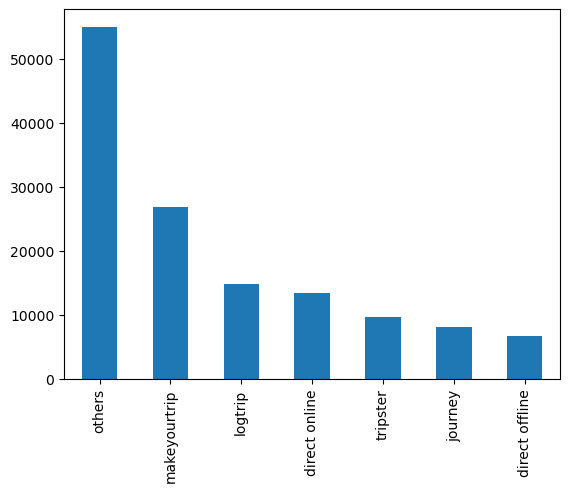

In [7]:
bookings.booking_platform.value_counts().plot(kind='bar')

## Statistics on the Numerical Column
We can see that the Average(mean) rating in 'ratings_given' column is 3.619004. 


The minimum number of guests in the 'no_guest' column shows -17 as the value, which signifies that Data Cleaning is required in the dataset.

In [8]:
bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


### Loading other Datasets 

In [9]:
date = pd.read_csv('dim_date.csv')
hotels = pd.read_csv('dim_hotels.csv')
rooms = pd.read_csv('dim_rooms.csv')
agg_bookings = pd.read_csv('fact_aggregated_bookings.csv')

In [10]:
date.head(5)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [11]:
hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [12]:
agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


## Exploratory Data Analysis

In [13]:
hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

In [14]:
hotels.city.value_counts()

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

<AxesSubplot:>

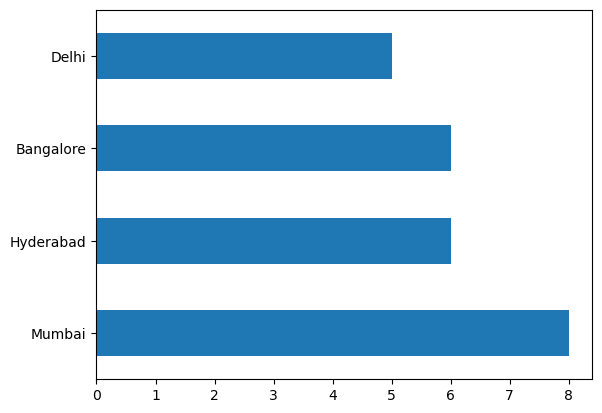

In [15]:
hotels.city.value_counts().plot(kind='barh')

## Exploring Aggregate Bookings

In [16]:
agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [17]:
agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

### Total booking per property_id

In [18]:
agg_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

### Days in which bookings are more than the capacity

In [19]:
agg_bookings[agg_bookings.successful_bookings>agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


### Properties with Highest Capacity

In [20]:
agg_sorted = agg_bookings.sort_values(by = 'capacity' , ascending = False)
agg_sorted.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity
3128,17558,1-Jun-22,RT2,19,50.0
2128,17558,22-May-22,RT2,38,50.0
1728,17558,18-May-22,RT2,21,50.0
5828,17558,28-Jun-22,RT2,26,50.0
3928,17558,9-Jun-22,RT2,27,50.0
928,17558,10-May-22,RT2,24,50.0
7428,17558,14-Jul-22,RT2,25,50.0
5728,17558,27-Jun-22,RT2,24,50.0
3528,17558,5-Jun-22,RT2,35,50.0
7528,17558,15-Jul-22,RT2,28,50.0


In [21]:
agg_bookings.capacity.max()

50.0

### Data Cleaning

In [22]:
bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


How can number of guests be -17 

In [23]:
bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [24]:
bookings[bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [25]:
bookings.shape

(134590, 12)

Below we will see that how removing such rows which have negative no_guests value will decrease the dataset total number of rows

In [26]:
bookings = bookings[bookings.no_guests>0]
bookings.shape

(134578, 12)

Considering any value which is 3 Standard deviation away as outliers and removing them.

In [27]:
bookings.revenue_generated.min(),bookings.revenue_generated.max()

(6500, 28560000)

In [28]:
avg , std = bookings.revenue_generated.mean() , bookings.revenue_generated.std()
avg , std

(15378.036937686695, 93040.15493143328)

In [29]:
higher_limit = avg + 3*std
higher_limit

294498.50173198653

In [30]:
lower_limit = avg - 3*std
lower_limit

-263742.4278566132

In [31]:
bookings[bookings.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [32]:
bookings[bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


Here we can see our outliers in the revenue_generated column.

In [33]:
bookings = bookings[bookings.revenue_generated<higher_limit]
bookings.shape

(134573, 12)

In [34]:
bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

To check if the Max value is correct we will again use 3 standard deviation method.

In [35]:
h_lim_realized = bookings.revenue_realized.mean() + 3 * bookings.revenue_realized.std()
h_lim_realized

33479.3586618449

In [36]:
bookings[bookings.revenue_realized > h_lim_realized]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


Number of Outliers are more so we need more details!

We have all RT 4 rooms here - they are Presidential suite !


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [37]:
rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


We will se just the Statistics of RT 4 rooms

We will se the **mean + 3 * standatd deviation** for just RT4 rooms and see is the upper limit a valid amount.

Here we are getting 50585.105 as the maximum price of 3 standard deviation for RT4 rooms

Now the rows having the **revenue_realized** more than 50585.105 will be considered as a outlier, but we can see that max when used describe is 45220.00 which is ok.


Thus no Data cleaning required for revenue_realized column.

In [38]:
bookings[bookings.room_category == 'RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [39]:
23439.308444 + 3 * 9048.599076

50585.105672000005

Checking for Null values

NA values are only in ratings_given which is ok.

In [40]:
bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc 

In aggregate bookings finding columns that have null values. Filling these null values with mean.

In [41]:
agg_bookings.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
6,19558,1-May-22,RT1,25,40.0
7,19560,1-May-22,RT1,23,26.0
8,17561,1-May-22,RT1,22,NaN
9,16560,1-May-22,RT1,24,34.0


In [42]:
agg_bookings.shape

(9200, 5)

In [43]:
agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [44]:
agg_bookings.capacity.mean()

25.280495759947815

In [45]:
agg_bookings.capacity.fillna(agg_bookings.capacity.mean(),inplace = True)

In [46]:
agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In aggregate bookings finding records that have successful_bookings value greater than capacity. Filtering those records

In [47]:
agg_bookings = agg_bookings[agg_bookings.successful_bookings<=agg_bookings.capacity]
agg_bookings.shape

(9194, 5)

### Data Transformation

In [48]:
agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


**Occupancy percent = successful bookings / capacity**

In [49]:
agg_bookings['Occupancy_percent'] = agg_bookings['successful_bookings'] / agg_bookings['capacity']
agg_bookings.head(8)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_percent
0,16559,1-May-22,RT1,25,30.000000,0.833333
1,19562,1-May-22,RT1,28,30.000000,0.933333
2,19563,1-May-22,RT1,23,30.000000,0.766667
4,16558,1-May-22,RT1,18,19.000000,0.947368
5,17560,1-May-22,RT1,28,40.000000,0.700000
6,19558,1-May-22,RT1,25,40.000000,0.625000
7,19560,1-May-22,RT1,23,26.000000,0.884615
8,17561,1-May-22,RT1,22,25.280496,0.870236


In [50]:
agg_bookings['Occupancy_percent']= agg_bookings['Occupancy_percent'].apply(lambda x : round(x * 100 , 2))
agg_bookings.head(8)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_percent
0,16559,1-May-22,RT1,25,30.000000,83.33
1,19562,1-May-22,RT1,28,30.000000,93.33
2,19563,1-May-22,RT1,23,30.000000,76.67
4,16558,1-May-22,RT1,18,19.000000,94.74
5,17560,1-May-22,RT1,28,40.000000,70.00
6,19558,1-May-22,RT1,25,40.000000,62.50
7,19560,1-May-22,RT1,23,26.000000,88.46
8,17561,1-May-22,RT1,22,25.280496,87.02


### Insight Generation


Average Occupancy rate per room category.

In [51]:
agg_bookings.groupby('room_category')['Occupancy_percent'].mean().round(2)

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: Occupancy_percent, dtype: float64

In [52]:
rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [53]:
df = pd.merge(agg_bookings,rooms,left_on = 'room_category', right_on = 'room_id')
df.head(6)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_percent,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard
5,19558,1-May-22,RT1,25,40.0,62.50,RT1,Standard


In [54]:
df.groupby('room_class')['Occupancy_percent'].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: Occupancy_percent, dtype: float64

### Average Occupancy Rate per city

In [55]:
hotels.tail()

,property_id,property_name,category,city
20,19560,Atliq City,Business,Bangalore
21,19561,Atliq Blu,Luxury,Bangalore
22,19562,Atliq Bay,Luxury,Bangalore
23,19563,Atliq Palace,Business,Bangalore
24,17564,Atliq Seasons,Business,Mumbai


In [56]:
df_dh = pd.merge(df,hotels, on = 'property_id')
df_dh.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_percent,room_id,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,RT1,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai


<AxesSubplot:xlabel='city'>

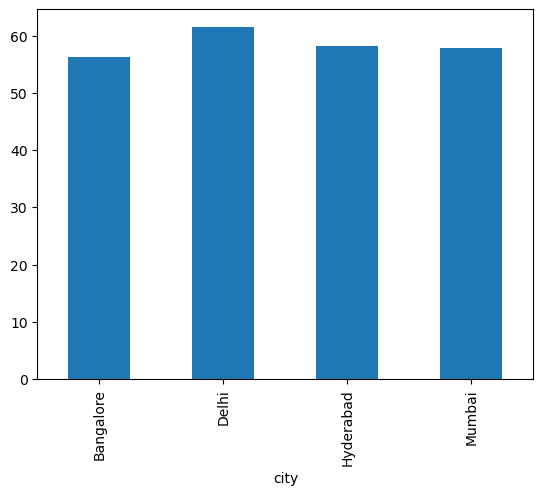

In [57]:
df_dh.groupby('city')['Occupancy_percent'].mean().round(1).plot(kind='bar')

When is the Occupancy better - Weekday or Weekend ?

In [58]:
df_dh.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_percent,room_id,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai


In [59]:
date.head(5)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [60]:
df_dh_d = pd.merge(df_dh,date,left_on = 'check_in_date', right_on = 'date')
df_dh_d.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_percent,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,RT2,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,RT3,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,RT4,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


<AxesSubplot:ylabel='day_type'>

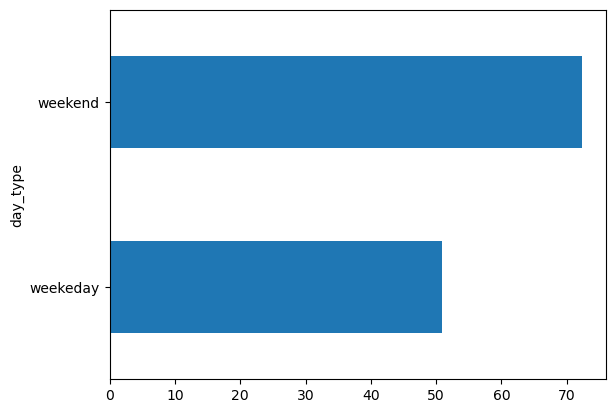

In [61]:
df_dh_d.groupby('day_type')['Occupancy_percent'].mean().plot(kind='barh')

## Maximum Occupancy rate of different city in June

In [62]:
df_dh_d['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [63]:
df_june = df_dh_d[df_dh_d['mmm yy'] =='Jun 22' ]
df_june.head(8)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_percent,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,RT2,Elite,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,RT3,Premium,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,61.11,RT4,Presidential,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,19562,10-Jun-22,RT1,19,30.0,63.33,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2205,19562,10-Jun-22,RT2,15,23.0,65.22,RT2,Elite,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2206,19562,10-Jun-22,RT3,17,29.0,58.62,RT3,Premium,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2207,19562,10-Jun-22,RT4,10,14.0,71.43,RT4,Presidential,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday


In [64]:
df_june.groupby('city')['Occupancy_percent'].mean().round(1).sort_values(ascending = False)

city
Delhi        62.5
Hyderabad    58.5
Mumbai       58.4
Bangalore    56.4
Name: Occupancy_percent, dtype: float64

We are given a new dataset for **August** now we have to append this data into our previous Dataset 

In [65]:
df_august = pd.read_csv('new_data_august.csv')
df_august

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [66]:
df_dh_d.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'Occupancy_percent', 'room_id', 'room_class',
       'property_name', 'category', 'city', 'date', 'mmm yy', 'week no',
       'day_type'],
      dtype='object')

In [67]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [68]:
# to concat 2 Dataframe we need to ensure that the number of columns are same in them
df_august.shape

(7, 13)

In [69]:
df_dh_d.shape

(6497, 15)

In [70]:
Latest_df = pd.concat([df_dh_d , df_august ], ignore_index = True , axis = 0)
Latest_df.tail(8)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occupancy_percent,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6496,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6497,16559,01-Aug-22,RT1,30,30.0,NaN,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6498,19562,01-Aug-22,RT1,21,30.0,NaN,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6499,19563,01-Aug-22,RT1,23,30.0,NaN,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


**Revenue realized per city**

In [71]:
bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [72]:
hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [73]:
Bookings_hotel = pd.merge(bookings,hotels, on = 'property_id')
Bookings_hotel.head(8)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi
5,May012216558RT19,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
6,May012216558RT110,16558,28-04-22,1/5/2022,2/5/2022,1.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
7,May012216558RT111,16558,29-04-22,1/5/2022,7/5/2022,1.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [74]:
Bookings_hotel.groupby('city')['revenue_realized'].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**Month by Month Revenue**

In [75]:
df_mbm_r = pd.merge(Bookings_hotel,date, left_on = 'check_in_date' , right_on = 'date')
df_mbm_r

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [76]:
Bookings_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [77]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [78]:
date['date'] = pd.to_datetime(date['date'])
date.head(8)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday
5,2022-05-06,May 22,W 19,weekeday
6,2022-05-07,May 22,W 19,weekend
7,2022-05-08,May 22,W 20,weekend


In [79]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [80]:
Bookings_hotel['check_in_date'] = pd.to_datetime(Bookings_hotel['check_in_date'])
Bookings_hotel.head(8)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,2022-01-05,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi
5,May012216558RT19,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
6,May012216558RT110,16558,28-04-22,2022-01-05,2/5/2022,1.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
7,May012216558RT111,16558,29-04-22,2022-01-05,7/5/2022,1.0,RT1,makeyourtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [81]:
Bookings_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [82]:
df_mbm_r = pd.merge(Bookings_hotel,date, left_on = 'check_in_date' , right_on = 'date')
df_mbm_r

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
3,May052216558RT14,16558,3/5/2022,2022-05-05,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
4,May052216558RT15,16558,30-04-22,2022-05-05,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92573,Jul312217564RT45,17564,30-07-22,2022-07-31,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,2022-07-31,Jul 22,W 32,weekend
92574,Jul312217564RT46,17564,29-07-22,2022-07-31,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,2022-07-31,Jul 22,W 32,weekend
92575,Jul312217564RT48,17564,30-07-22,2022-07-31,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai,2022-07-31,Jul 22,W 32,weekend
92576,Jul312217564RT49,17564,29-07-22,2022-07-31,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai,2022-07-31,Jul 22,W 32,weekend


In [83]:
df_mbm_r.groupby('mmm yy')['revenue_realized'].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

**Revenue Realized per Hotel type**

In [84]:
df_mbm_r.groupby('property_name')['revenue_realized'].sum()

property_name
Atliq Bay        179416721
Atliq Blu        179203544
Atliq City       196555383
Atliq Exotica    219076161
Atliq Grands     145860641
Atliq Palace     209474575
Atliq Seasons     45920757
Name: revenue_realized, dtype: int64

**Average Rating per City**

In [85]:
df_mbm_r.groupby('city')['ratings_given'].mean().round(1)

city
Bangalore    3.4
Delhi        3.8
Hyderabad    3.7
Mumbai       3.6
Name: ratings_given, dtype: float64

**Pie-Chart of Revenue Realized per booking platform**

<AxesSubplot:ylabel='revenue_realized'>

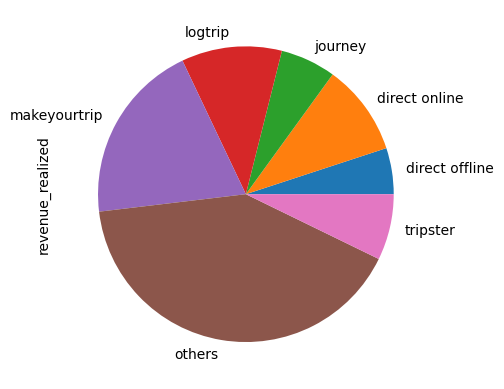

In [86]:
df_mbm_r.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")